[共筆連結](https://hackmd.io/lv8biv1uQy2HtbeQU75yvw)

[link text](https://)# Level 1 - Basic Titanic Analysis

![](https://i.imgur.com/ukST9LHl.png)


In [0]:
# import some basic library

import pandas as pd
from IPython.display import display

import numpy as np

# Plot
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
plt.style.use('ggplot')

# model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# one-hot encoding
from sklearn.preprocessing import LabelEncoder

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
# read data

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

FileNotFoundError: ignored

In [0]:
# Pandas operating

# practice 1 - Show data info
    # hint: common function that get data info
    # head()
    # tail()
    # info()
    # describe()

# practice 2
    # 2.1 display one column
    # 2.2 display two columns
    # 2.3 add new column
    # 2.4 remove column

22.0

In [0]:
# merge training set to test set, and store it to a variable named all_data, it will convenient to feature engineering

# hint: append()

In [0]:
# it's time to google
# we can observe data by plotting

# hint: common seaborn(sns) function
# sns.countplot()
# sns.barplot()
# sns.boxplot()

# task 1: plot the number of survivor and dead
# task 2-1: plot the number of survivor and dead that hue Pcalss
# task 2-2: plot the number of survivor and dead that hue sex

In [0]:
# one-hot encoding

label_encoder = LabelEncoder()
all_data['Sex'] = label_encoder.fit_transform(all_data['Sex'])
display(all_data['Sex'])

# additional - another method of ont hot encoding
# all_data['Sex'] = all_data['Sex'].map({'female': 0, 'male': 1})

0      1
1      0
2      0
3      0
4      1
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 1309, dtype: int64

In [0]:
# split all data into train set and test set

train_data = all_data[:len(train_data)]
test_data = all_data[len(train_data):]

x_train = train_data[['Sex', 'Pclass']]
x_test = test_data[['Sex', 'Pclass']]

y_train = train_data['Survived']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
Age            714 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
SibSp          891 non-null int64
Survived       891 non-null float64
Ticket         891 non-null object
dtypes: float64(3), int64(5), object(4)
memory usage: 90.5+ KB


None

In [0]:
# train model that use k-NN
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)

# another model - Random Forest
# model = RandomForestClassifier(
#     random_state=3,
#     n_estimators=250,
#     min_samples_split=20,
#     oob_score=True
# )

# model.fit(x_train, y_train)
# print(model.oob_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
# model predict

results = model.predict(x_test)
results = pd.DataFrame({
    'PassengerId' : test_data['PassengerId'],
    'Survived' : results
})

results.to_csv("submission.csv", index=False)
# files.download('submission.csv')

# Level 2 - Try to upgrade model's score
You can append other data to feature (input) just now.

In [0]:
# Check missing value
def missing_counts(data): 
    missing = data.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True) 

    missing_count = pd.DataFrame({
        'ColumnName': missing.index,
        'MissingCount': missing.values
    })

    missing_count['Percentage(%)'] = missing_count['MissingCount'].apply(lambda x: round(x / data.shape[0] * 100, 2))
    return  missing_count

all_data = train_data.append(test_data)
missing_counts(all_data)

,ColumnName,MissingCount,Percentage(%)
0,Fare,1,0.08
1,Embarked,2,0.15
2,Age,263,20.09
3,Survived,418,31.93
4,Cabin,1014,77.46


In [0]:
# Embarked
# Remember to use one-hot encoding

# hint: common function that maybe you will use
# value_counts()
# fillna()
# LabelEncoder

S    916
C    270
Q    123
Name: Embarked, dtype: int64

2    916
0    270
1    123
Name: Embarked, dtype: int64

,ColumnName,MissingCount,Percentage(%)
0,Fare,1,0.08
1,Survived,418,31.93
2,Cabin,1014,77.46


In [0]:
# Fare

In [0]:
# try to use other features(Embarked and Fare) and input that into k-NN model again
# Remember to let data split into training set and test set

# Level 3 - Advanced Analysis

count    756.000000
mean      33.322090
std       12.681912
min       11.000000
25%       24.000000
50%       30.000000
75%       41.000000
max       80.000000
Name: Age, dtype: float64

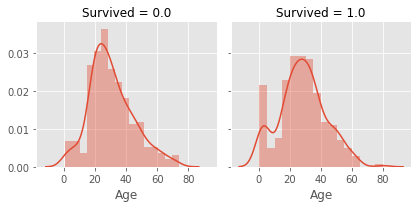

In [0]:
# age, title - 1

# display(all_data['Age'].describe())
display(all_data[all_data['Name'].str.contains('Mr')]['Age'].describe())

g = sns.FacetGrid(all_data, col="Survived")
g.map(sns.distplot, 'Age', kde=True)

In [0]:
# age, title - 2

# split()
all_data['Title'] = all_data['Name'].str.split(', ', expand=True)[1]
all_data['Title'] = all_data['Title'].str.split('.', expand=True)[0]
all_data['Title'].unique()

# Divide names into five categories: Mr, Mrs, Miss, Master, Rare
# replace()
all_data['Title'] = all_data['Title'].replace(['Don','Rev','Dr','Major','Lady','Sir','Col','Capt','Countess','Jonkheer','Dona'], 'Rare')
all_data['Title'] = all_data['Title'].replace(['Ms','Mlle'], 'Miss')
all_data['Title'] = all_data['Title'].replace(['Mme', 'the Countess'], 'Mrs')
display(all_data['Title'].unique())

# Handling missing age value

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

5

,ColumnName,MissingCount,Percentage(%)
0,Fare,1,0.08
1,Survived,418,31.93
2,Cabin,1014,77.46


In [0]:
# SibSp (Sisters, brothers, spouse) and Parch (parents and children)

# hint: Maybe you can get new feature (FamilySize) by combining those features (SibSp and Parch)


# drop the features that Sibsp and Parch
all_data.drop(['Title'], axis=1, inplace=True)
display(all_data) 

,Age,Cabin,Embarked,Fare,Pclass,Sex,Survived,Ticket,FamilySize
0,22.0,NaN,S,7.2500,3,male,0.0,A/5 21171,2
1,38.0,C85,C,71.2833,1,female,1.0,PC 17599,2
2,26.0,NaN,S,7.9250,3,female,1.0,STON/O2. 3101282,1
3,35.0,C123,S,53.1000,1,female,1.0,113803,2
4,35.0,NaN,S,8.0500,3,male,0.0,373450,1
...,...,...,...,...,...,...,...,...,...
413,32.0,NaN,S,8.0500,3,male,NaN,A.5. 3236,1
414,39.0,C105,C,108.9000,1,female,NaN,PC 17758,1
415,38.5,NaN,S,7.2500,3,male,NaN,SOTON/O.Q. 3101262,1
416,32.0,NaN,S,8.0500,3,male,NaN,359309,1
